## 🎄 [Day 3](https://adventofcode.com/2018/day/3)

In [0]:
import numpy as np

def get_rectangles(inputs):
  """Parse inputs coordinates into rectangles"""
  rectangles = np.zeros((len(inputs), 4), dtype=np.int32)
  for l in inputs:
    aux = l.split()
    i = int(aux[0][1:]) - 1
    xmin, ymin = tuple(map(int, aux[2][:-1].split(',')))
    width, height = tuple(map(int, aux[3].split('x')))
    rectangles[i, :] = [xmin, ymin, xmin + width, ymin + height]
  return rectangles

def get_collisions(inputs):
  """Get coordinates where patches intersect"""
  R = get_rectangles(inputs)
  xmax = np.amax(R[:, 2])
  ymax = np.amax(R[:, 3])
  canvas = np.zeros((xmax + 1, ymax + 1), dtype=np.int)
  for r in R:
    canvas[r[0]:r[2], r[1]:r[3]] += 1
  num_collisions = np.sum(canvas > 1)
  return num_collisions
  
def get_survivor(inputs):  
  """Get the only patch which does not intersect with anyone"""
  R = get_rectangles(inputs)
  intersect = np.maximum(0,  np.minimum(R[:, None, 2], R[None, :, 2]) -
                         np.maximum(R[:, None, 0], R[None, :, 0]))
  intersect *= np.maximum(0,  np.minimum(R[:, None, 3], R[None,:, 3]) -
                          np.maximum(R[:, None, 1], R[None, :, 1]))
  np.fill_diagonal(intersect, 0)
  intersect = np.sum(intersect, axis=0)
  indices = np.argwhere(intersect == 0)
  return inputs[indices[0][0]]

In [2]:
with open("day3.txt", 'r') as f:
  inputs = f.read().splitlines()
  
print('Overlapping square inches:', get_collisions(inputs))
print('Overlap-free Patch:', get_survivor(inputs))

Overlapping square inches: 121259
Overlap-free Patch: #239 @ 851,350: 19x16


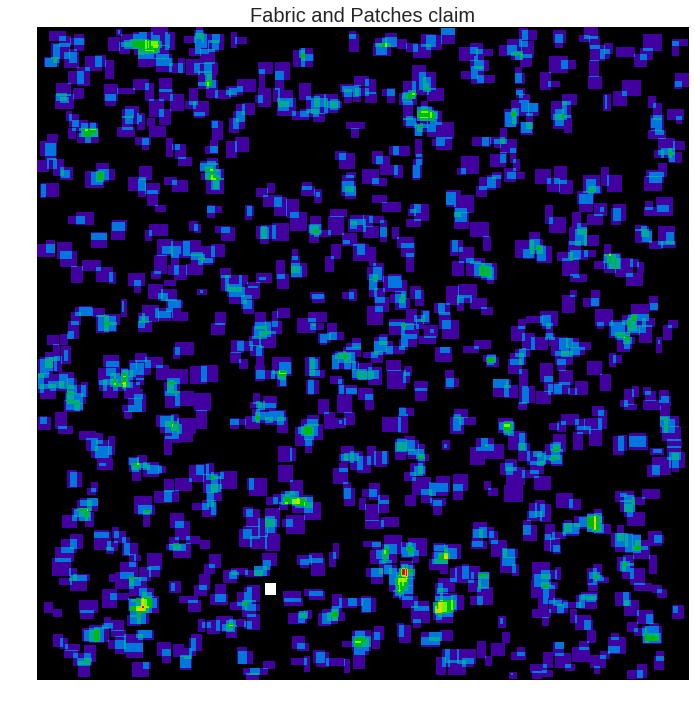

In [26]:
#@title Visualize the fabric
from matplotlib import pyplot as plt

def visualize(inputs, free_patch):
  R = get_rectangles(inputs)
  canvas = np.zeros((np.amax(R[:, 2]), np.amax(R[:, 3])))
  for r in R:
    canvas[r[0]:r[2], r[1]:r[3]] += 1
  max_val = np.amax(canvas)
  canvas[free_patch[0]:free_patch[0] + free_patch[2], free_patch[1]:free_patch[1] + free_patch[3]] = np.nan
  plt.figure(figsize=(12, 12))
  plt.imshow(canvas, cmap='nipy_spectral', vmin=0, vmax=max_val)
  plt.axis('off')
  plt.title('Fabric and Patches claim', fontsize=20)
  plt.show()
  
visualize(inputs, (851, 350, 19, 16))